In [33]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
from matplotlib import pyplot as plt

In [23]:
chroma_client = chromadb.PersistentClient(path="vectordb")

In [24]:
# Instantiate image loader helper.
image_loader = ImageLoader()

# Instantiate multimodal embedding function.
multimodal_ef = OpenCLIPEmbeddingFunction()

In [25]:
multimodal_db = chroma_client.get_or_create_collection(name="multimodal_db", embedding_function=multimodal_ef,
                                                       data_loader=image_loader)

In [20]:
#Example
# multimodal_db.add(
#     ids=['0', '1'],
#     uris=['images/lion.jpg', 'images/tiger.jpg'],
#     metadatas=[{'img_category': 'animals'}, {'img_category': 'animals'}]
# )
# delete the collection
# chroma_client.delete_collection("multimodal_db")

In [27]:
import os


def get_img_files():
    img_files = []
    for file in os.listdir("Brand2"):
        if file.endswith(".jpg"):
            img_files.append(file)
    return img_files


len(get_img_files()), get_img_files()

(5455,
 ['06J-0084-CUERO (1).jpg',
  '06J-0084-CUERO (2).jpg',
  '06J-0084-CUERO (3).jpg',
  '06J-0084-CUERO (4).jpg',
  '06J-0098-BLACK (1).jpg',
  '06J-0098-BLACK (2).jpg',
  '06J-0098-BLACK (3).jpg',
  '06J-0098-BLACK (4).jpg',
  '06J-0098-BLUE (1).jpg',
  '06J-0098-BLUE (2).jpg',
  '06J-0098-BLUE (3).jpg',
  '06J-0098-BLUE (4).jpg',
  '06J-0098-CUERO (1).jpg',
  '06J-0098-CUERO (2).jpg',
  '06J-0098-CUERO (3).jpg',
  '06J-0098-CUERO (4).jpg',
  '06J-5433-CUERO (1).jpg',
  '06J-5433-CUERO (2).jpg',
  '06J-5433-CUERO (3).jpg',
  '06J-5433-CUERO (4).jpg',
  '06J-5433C1-BLUE (1).jpg',
  '06J-5433C1-BLUE (2).jpg',
  '06J-5433C1-BLUE (3).jpg',
  '06J-5433C1-BLUE (4).jpg',
  '06J-5433C1-CASTOR (1).jpg',
  '06J-5433C1-CASTOR (2).jpg',
  '06J-5433C1-CASTOR (3).jpg',
  '06J-5433C1-CASTOR (4).jpg',
  '06J-5433C1-HONEY (1).jpg',
  '06J-5433C1-HONEY (2).jpg',
  '06J-5433C1-HONEY (3).jpg',
  '06J-5433C1-HONEY (4).jpg',
  '06J-5433C1-PICKLE (1).jpg',
  '06J-5433C1-PICKLE (2).jpg',
  '06J-5433C1-P

In [28]:
import re

for i, img_file in enumerate(get_img_files()):
    img_id = str(i)
    metadata_match = re.match(r'(.+?)(\(\d+\))?\.(\w+)', img_file)
    if metadata_match:
        metadata = metadata_match.group(1).replace(" ", "")
    else:
        metadata = img_file.split(".")[0].replace(" ", "")
    img_uri = f"Brand2/{img_file}"
    img_metadata = {"filename": metadata}
    print(img_id, metadata)
    multimodal_db.add(ids=[img_id], uris=[img_uri], metadatas=[img_metadata])

0 06J-0084-CUERO
1 06J-0084-CUERO
2 06J-0084-CUERO
3 06J-0084-CUERO
4 06J-0098-BLACK
5 06J-0098-BLACK
6 06J-0098-BLACK
7 06J-0098-BLACK
8 06J-0098-BLUE
9 06J-0098-BLUE
10 06J-0098-BLUE
11 06J-0098-BLUE
12 06J-0098-CUERO
13 06J-0098-CUERO
14 06J-0098-CUERO
15 06J-0098-CUERO
16 06J-5433-CUERO
17 06J-5433-CUERO
18 06J-5433-CUERO
19 06J-5433-CUERO
20 06J-5433C1-BLUE
21 06J-5433C1-BLUE
22 06J-5433C1-BLUE
23 06J-5433C1-BLUE
24 06J-5433C1-CASTOR
25 06J-5433C1-CASTOR
26 06J-5433C1-CASTOR
27 06J-5433C1-CASTOR
28 06J-5433C1-HONEY
29 06J-5433C1-HONEY
30 06J-5433C1-HONEY
31 06J-5433C1-HONEY
32 06J-5433C1-PICKLE
33 06J-5433C1-PICKLE
34 06J-5433C1-PICKLE
35 06J-5433C1-PICKLE
36 06J-5818-BLACK
37 06J-5818-BLACK
38 06J-5818-BLACK
39 06J-5818-BLACK
40 06J-5818-BLUE
41 06J-5818-BLUE
42 06J-5818-BLUE
43 06J-5818-BLUE
44 06J-5818-BRANDY
45 06J-5818-BRANDY
46 06J-5818-BRANDY
47 06J-5818-BRANDY
48 06J-5818-CUERO
49 06J-5818-CUERO
50 06J-5818-CUERO
51 06J-5818-CUERO
52 06J-5818-OLMO
53 06J-5818-OLMO
54 06J-5

In [29]:
# Check record count
multimodal_db.count()

5455

In [30]:
def print_query_results(query_list: list, query_results: dict) -> None:
    result_count = len(query_results['ids'][0])
    for i in range(len(query_list)):
        print(f'Results for query: {query_list[i]}')
        for j in range(result_count):
            id = query_results["ids"][i][j]
            distance = query_results['distances'][i][j]
            data = query_results['data'][i][j]
            document = query_results['documents'][i][j]
            metadata = query_results['metadatas'][i][j]
            uri = query_results['uris'][i][j]
            print(f'id: {id}, distance: {distance}, metadata: {metadata}, document: {document}')
            print(f'data: {uri}')
            plt.imshow(data)
            plt.axis("off")
            plt.show()

Results for query: high heals
id: 371, distance: 1.4290796518325806, metadata: {'filename': '1489-3366A-GREENSOFT'}, document: None
data: Brand2/1489-3366A-GREENSOFT (5).jpg


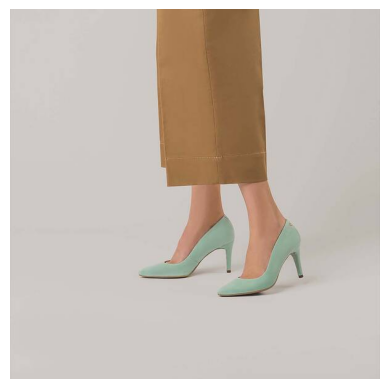

id: 366, distance: 1.4290796518325806, metadata: {'filename': '1489-3366A-GREEN'}, document: None
data: Brand2/1489-3366A-GREEN (9).jpg


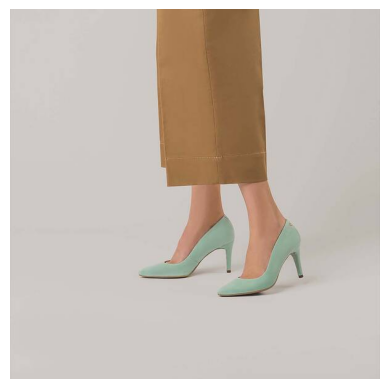

id: 475, distance: 1.4522262811660767, metadata: {'filename': '1489-3366Z-FRAMBUESA'}, document: None
data: Brand2/1489-3366Z-FRAMBUESA (4).jpg


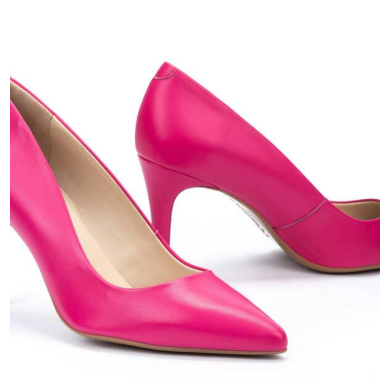

In [31]:
query_texts = ['high heals']

# Query vector db
query_results = multimodal_db.query(
    query_texts=query_texts,
    n_results=3,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
)

print_query_results(query_texts, query_results)

Results for query: Brand1/16002-318 (2).jpg
id: 3980, distance: 0.6825116872787476, metadata: {'filename': 'W7C-4546-BRANDY'}, document: None
data: Brand2/W7C-4546-BRANDY (4).jpg


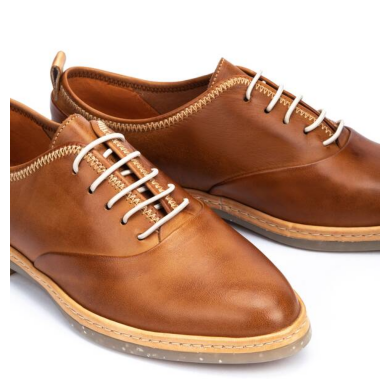

id: 3979, distance: 0.7057169675827026, metadata: {'filename': 'W7C-4546-BRANDY'}, document: None
data: Brand2/W7C-4546-BRANDY (3).jpg


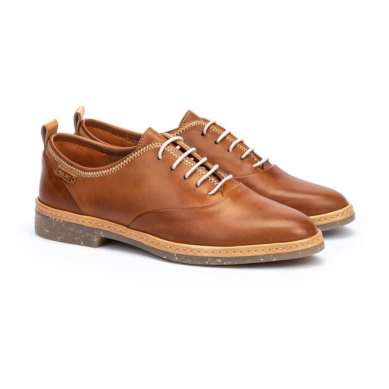

In [32]:
from PIL import Image

query_image = 'Brand1/16002-318 (2).jpg'
uri = query_image.split("/")[1]
code = uri.split("(")[0].replace(" ", "")
query_results = multimodal_db.query(
    query_uris=[query_image],
    n_results=2,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
    where={'filename': {'$ne': code}}
)
print_query_results([query_image], query_results)

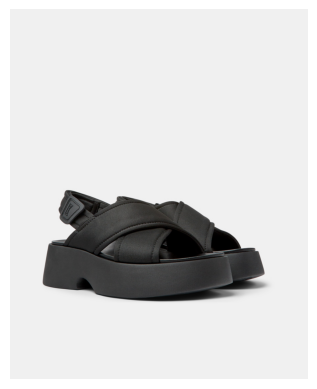

In [33]:
image_uri = "Brand1/K201610-001 (2).jpg"
image = Image.open(image_uri)
plt.imshow(image)
plt.axis("off")
plt.show()

Results for query: [[[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]

 [[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]

 [[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]

 ...

 [[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]

 [[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]

 [[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]]
id: 2482, distance: 0.7043392658233643, metadata: {'filename': 'W0X-0552-BLACK'}, document: None
data: Brand2/W0X-0552-BLACK (4).jpg


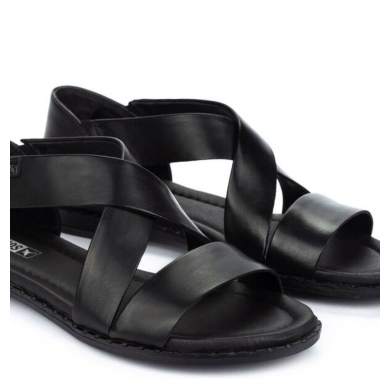

id: 3672, distance: 0.7228871583938599, metadata: {'filename': 'W5E-0565-BLACK'}, document: None
data: Brand2/W5E-0565-BLACK (1).jpg


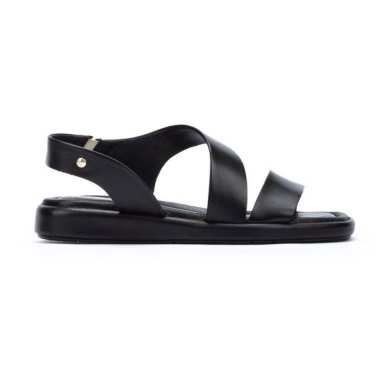

In [34]:
import numpy as np

image_path = "Brand1/K201610-001 (2).jpg"
image_uri = np.array(Image.open(image_path))
query_images = [image_uri]

query_results = multimodal_db.query(
    query_images=query_images,
    n_results=2,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
)
print_query_results(query_images, query_results)